# <p style="text-align: center;"> Final Project - Introduction to Data Science</p>
# <p style="text-align: center;"> <b> Data Pre-processing </b></p>
---

## Member Information
| Name              | ID       |
|-------------------|----------|
|Tran Đinh Quang    | 21127406 |
|Nguyen Hong Hanh   | 21127503 |
|Đo Quoc Tri  | 21127556 |
| Nguyen Khanh Nhan | 21127657         |


## Table of contents



---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
FILE_PATH = '../data/raw.csv'
df = pd.read_csv(FILE_PATH)

df.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,severerisk
0,2009-09-27,1253984400,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,...,1254004923,17:46:17,1254048377,0.27,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN
1,2009-09-28,1254070800,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,...,1254091320,17:45:39,1254134739,0.30,Overcast,Cloudy skies throughout the day.,cloudy,['48900099999'],obs,NaN
2,2009-09-29,1254157200,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,...,1254177718,17:45:01,1254221101,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN
3,2009-09-30,1254243600,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,...,1254264116,17:44:24,1254307464,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN
4,2009-10-01,1254330000,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,...,1254350514,17:43:46,1254393826,0.40,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN


# Add - Remove columns

**Numeric data:**

*   'datetime', 'dateEpoch': the purpose of the problem is to rely on environmental data to predict the weather at that specific time. Therefore, when it comes to time, we will use a column for  month for analysis instead of storing a specific date
*   'precip', 'precipprob', 'precipcover': remove because, for the data of precipitation, we have a column 'preciptype' with only 2 values: 'rain' or null, and others are equal 0 when 'preciptype' is null. It's possible to consider merging these columns into one 'preciptype' column with boolean data type (0: null, 1: rain)
*   'sunrise', 'sunset', 'sunriseEpoch', 'sunsetEpoch': for the sunrise and sunset times, we will store as the number of seconds since 00:00 so that it will be convenient when analyze the relationships between these two columns and the remaining columns in the dataframe
*   'snow', 'snowdepth': as the data is obtained from Ho Chi Minh City, Vietnam, a city where snowfall never occurs, we will remove columns related to snow with a high number of missing values
*   'windgust', 'severerisk': remove due to a high percentage of missing values (90%) and lack of meaningful relevance to the posed problem

In [4]:
df['month'] = pd.to_datetime(df['datetime']).dt.month

# df['preciptype'][115] là chỗ ['rain'], để == ['rain'] thì nó không nhận ra?
df['preciptype'] = [1 if i == df['preciptype'][115] else 0 for i in df['preciptype']]

df['sunrise'] = pd.to_datetime(df['sunrise'], format='%H:%M:%S')

df['sunrise'] = df['sunrise'].dt.hour * 3600 + df['sunrise'].dt.minute * 60 + df['sunrise'].dt.second

df['sunset'] = pd.to_datetime(df['sunset'], format='%H:%M:%S')

df['sunset'] = df['sunset'].dt.hour * 3600 + df['sunset'].dt.minute * 60 + df['sunset'].dt.second

drop_columns = ['datetime', 'datetimeEpoch','precip', 'precipprob', 'precipcover', 'windgust', 'sunriseEpoch', 'sunsetEpoch', 'snow', 'snowdepth', 'severerisk']

df = df.drop(columns=drop_columns, axis=1)

df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations,source,month
0,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,0,18.3,...,NaN,20523,63977,0.27,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,9
1,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,0,13.9,...,NaN,20520,63939,0.30,Overcast,Cloudy skies throughout the day.,cloudy,['48900099999'],obs,9
2,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,0,16.1,...,NaN,20518,63901,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,9
3,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,0,17.2,...,NaN,20516,63864,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,9
4,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,0,12.8,...,NaN,20514,63826,0.40,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,10


**Categorical data**

*   'description', 'conditons': remove because we only need one column with good classification properties to serve as the label ('icon')
*   'stations': remove as its values are complex and not helpful for this project
*   'source': remove as it has only one unique value

In [5]:
drop_columns = ['description', 'conditions', 'stations', 'source']

df = df.drop(columns=drop_columns, axis=1)

df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,icon,month
0,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,0,18.3,...,87.9,5.6,NaN,NaN,NaN,20523,63977,0.27,partly-cloudy-day,9
1,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,0,13.9,...,90.4,6.6,NaN,NaN,NaN,20520,63939,0.30,cloudy,9
2,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,0,16.1,...,82.1,6.6,NaN,NaN,NaN,20518,63901,0.34,partly-cloudy-day,9
3,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,0,17.2,...,90.0,5.7,NaN,NaN,NaN,20516,63864,0.37,partly-cloudy-day,9
4,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,0,12.8,...,70.8,6.6,NaN,NaN,NaN,20514,63826,0.40,partly-cloudy-day,10


# Detect outlier

In [6]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,month
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,...,4999.000000,5000.000000,5000.000000,4904.000000,4904.000000,4904.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,91.041220,76.14564,82.354120,99.919340,76.942880,87.187940,73.726820,77.205960,0.62780,12.067560,...,1008.960392,56.483300,6.055920,205.420310,17.744168,7.201876,20974.707800,64603.808400,0.483794,6.501000
std,3.281317,3.21651,2.659416,5.709696,4.945019,5.232159,3.837916,9.359366,0.48344,3.317442,...,2.042986,14.138278,1.174452,59.917768,5.181503,2.019694,884.759487,1006.387513,0.288521,3.480693
min,73.600000,44.50000,71.700000,73.600000,41.200000,71.700000,54.100000,49.500000,0.00000,4.500000,...,1000.500000,12.900000,3.200000,15.000000,1.300000,1.000000,19777.000000,62796.000000,0.000000,1.000000
25%,89.600000,74.37500,80.700000,96.400000,74.375000,83.575000,71.800000,70.800000,0.00000,9.800000,...,1007.600000,46.700000,5.800000,155.975000,13.500000,6.000000,20388.000000,63715.750000,0.250000,3.000000
50%,91.400000,76.90000,82.400000,100.300000,76.900000,86.800000,74.800000,77.900000,1.00000,11.400000,...,1008.800000,55.400000,6.100000,204.700000,17.700000,7.000000,20608.000000,64989.500000,0.480000,6.000000
75%,93.200000,78.70000,84.100000,103.900000,78.700000,90.400000,76.500000,84.300000,1.00000,13.900000,...,1010.300000,65.900000,6.400000,255.400000,22.000000,9.000000,21733.000000,65337.000000,0.750000,10.000000
max,100.500000,85.90000,90.500000,119.700000,100.300000,106.900000,81.400000,99.800000,1.00000,31.100000,...,1015.800000,100.000000,47.600000,324.200000,28.000000,10.000000,22618.000000,66006.000000,0.980000,12.000000


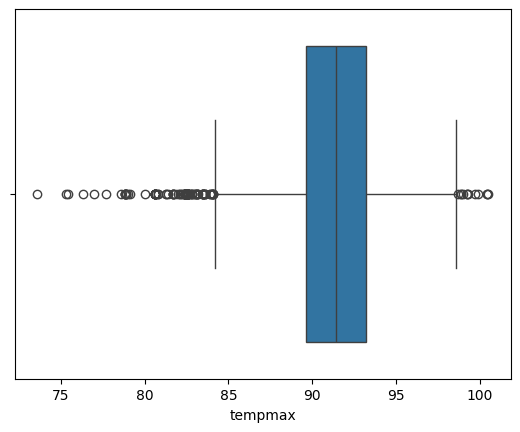

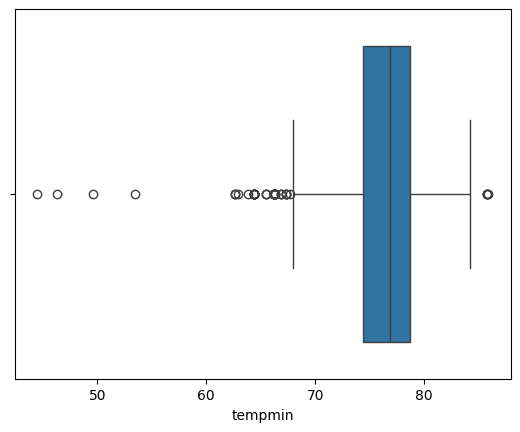

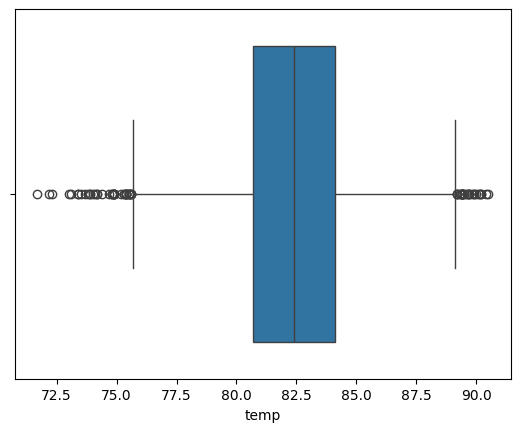

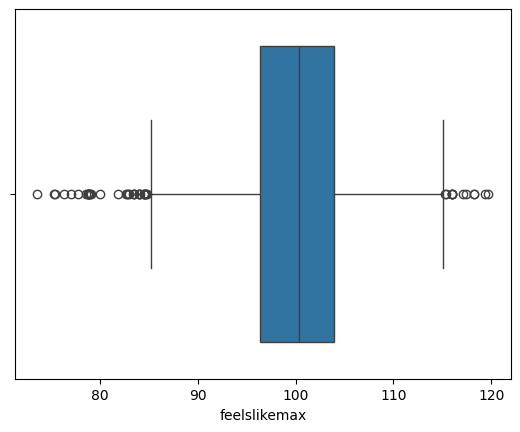

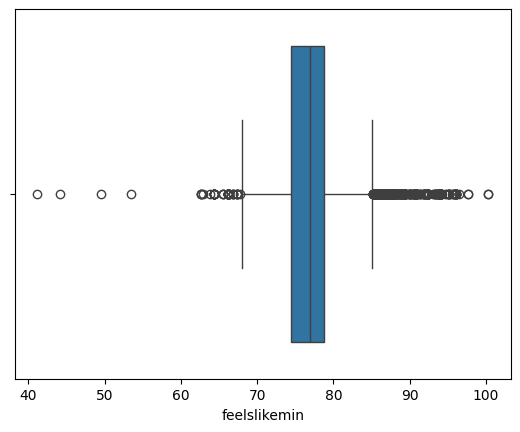

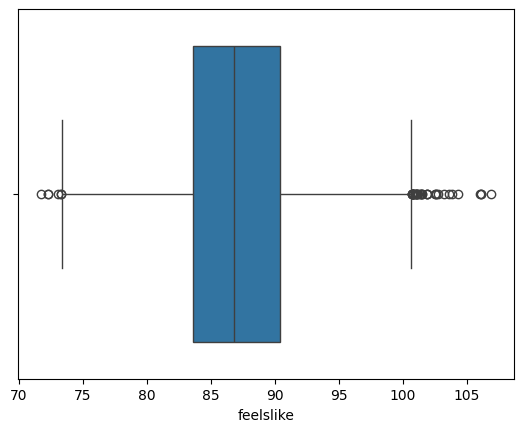

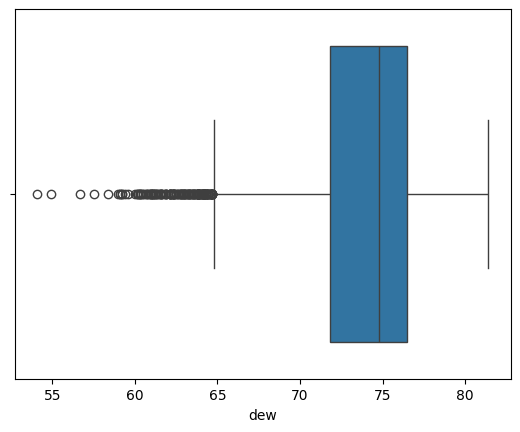

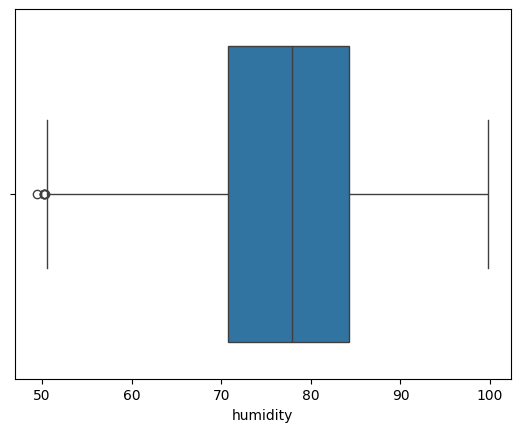

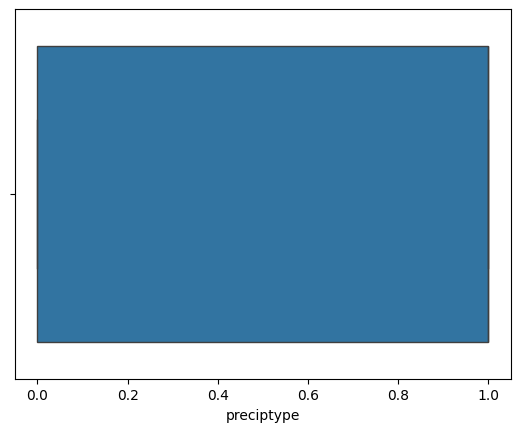

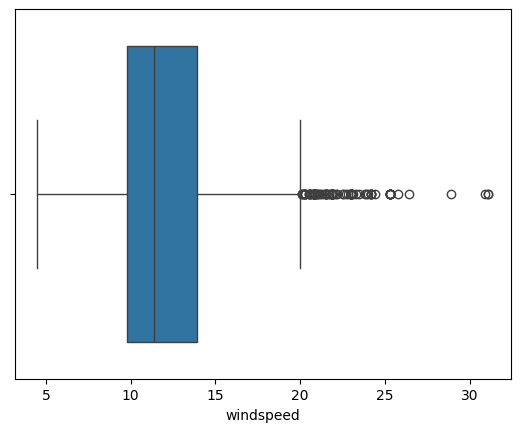

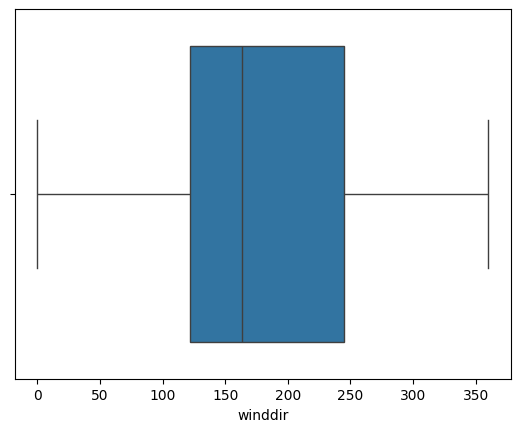

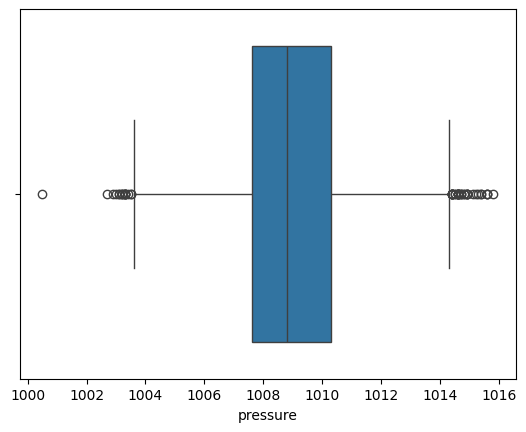

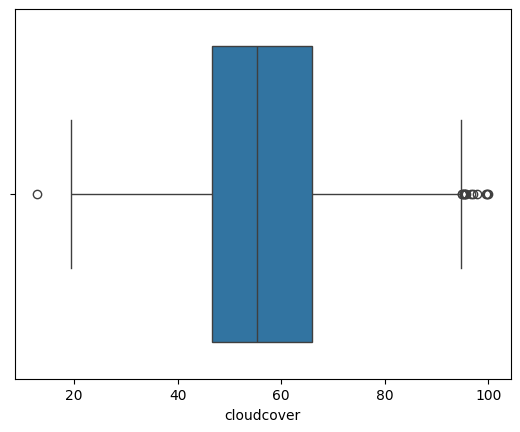

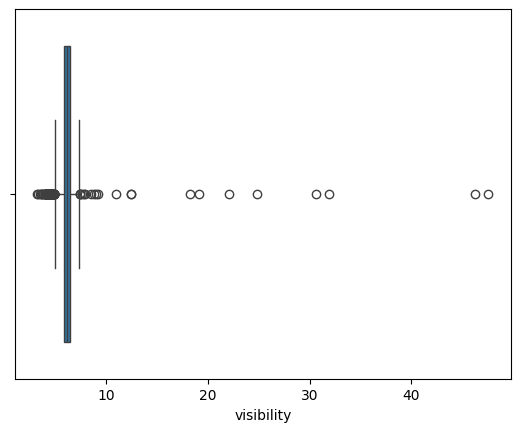

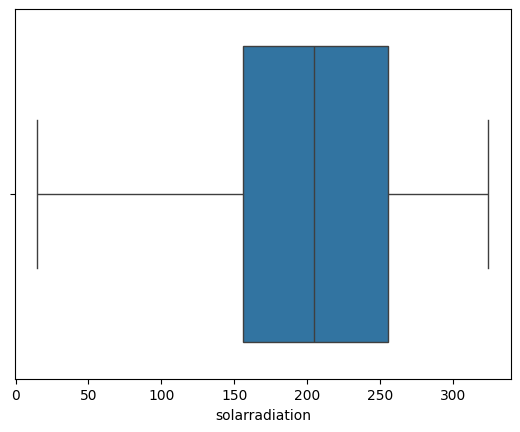

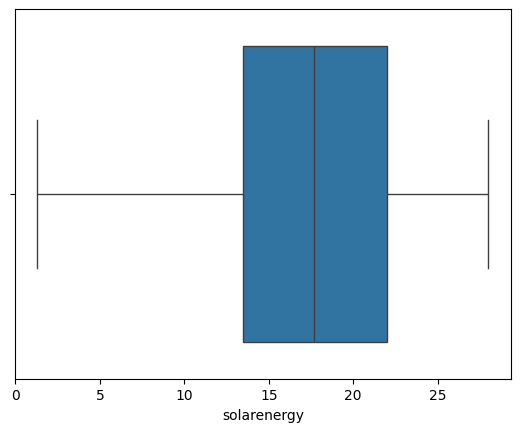

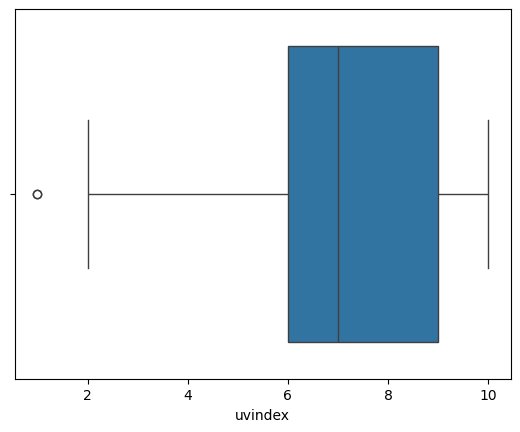

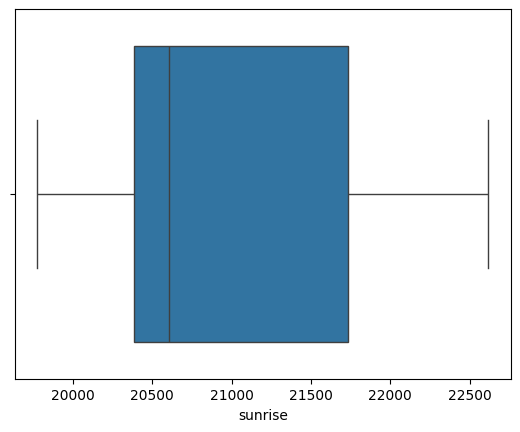

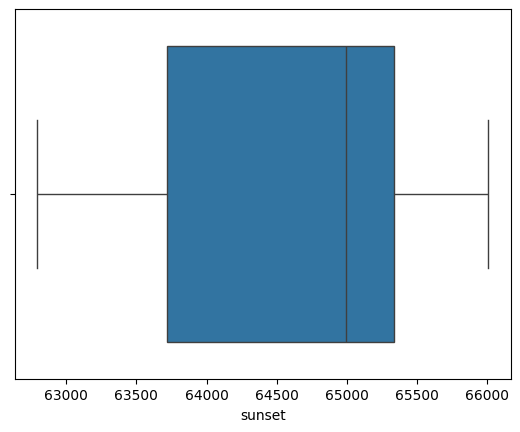

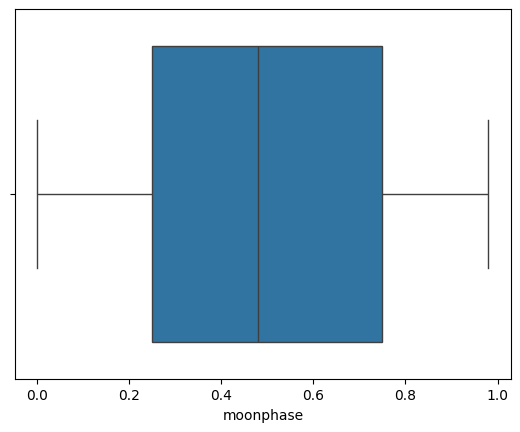

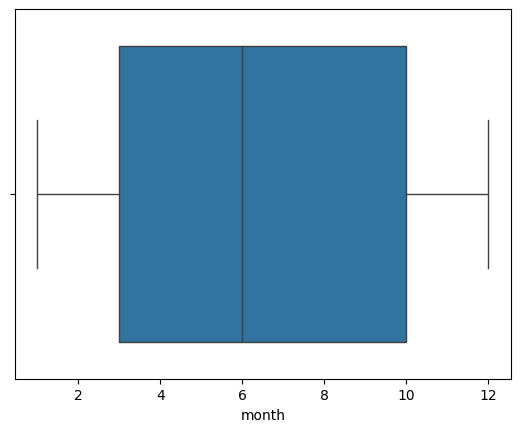

In [7]:
numeric_cols = df.drop(columns=['icon'])

for col in numeric_cols:
    sns.boxplot(x = df[col])
    plt.show()

Since there are quite many features with outliers and no domain knowledge available, only extreme outliers will be removed

In [8]:
columns = ['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'dew',  'windspeed', 'visibility']

threshold = 3

for column in columns:
    z_scores = stats.zscore(df[column])
    df = df[(z_scores < threshold) & (z_scores > -threshold)]

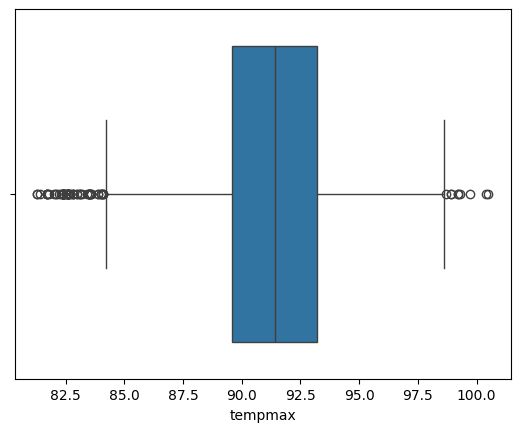

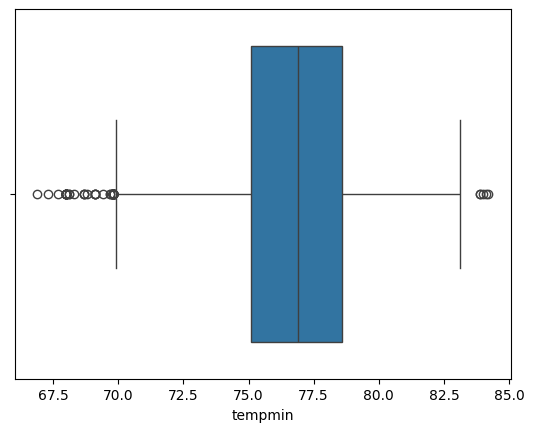

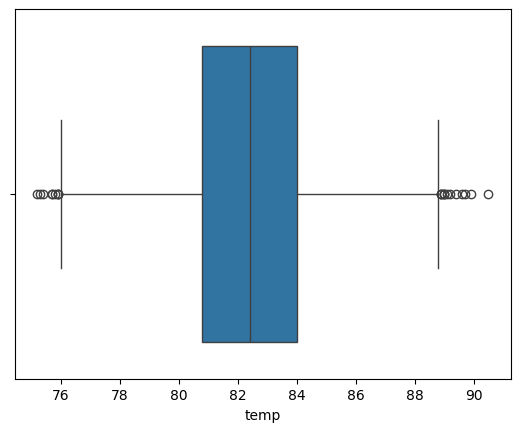

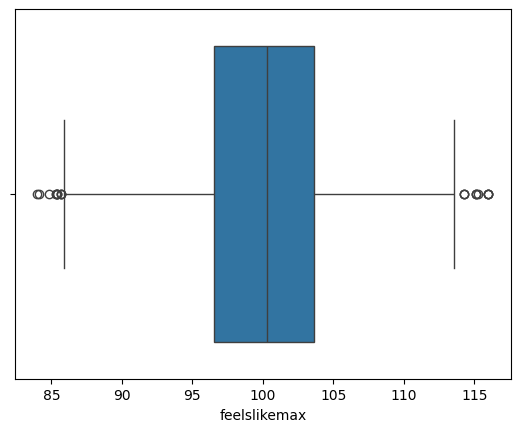

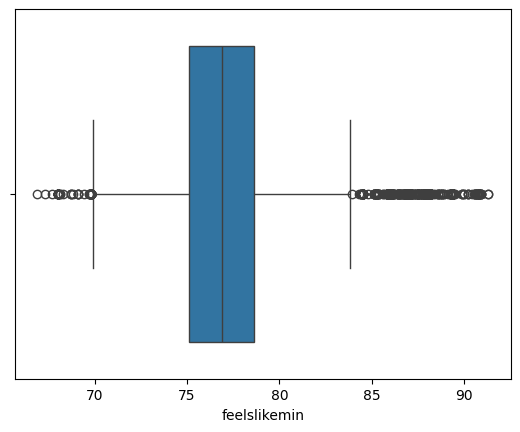

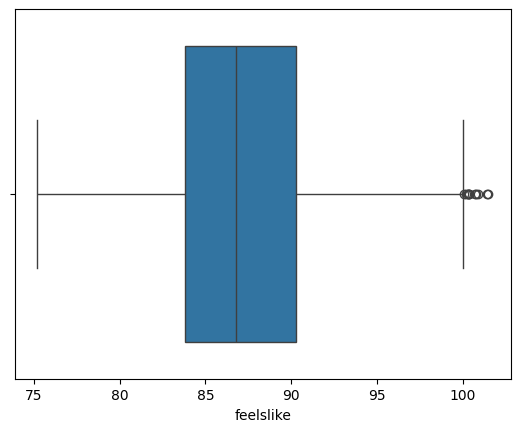

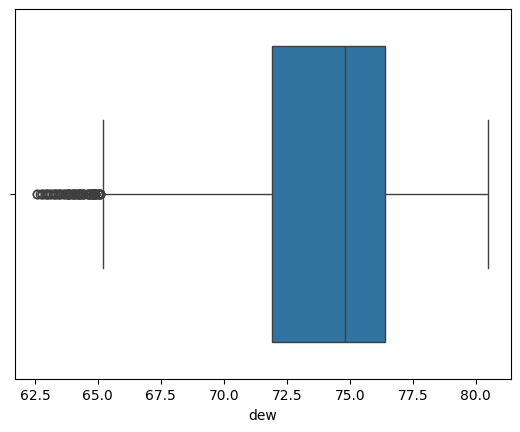

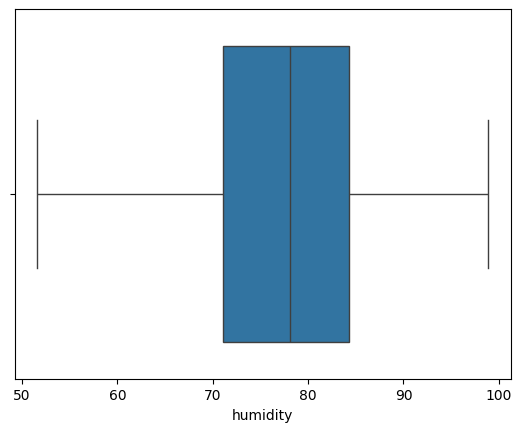

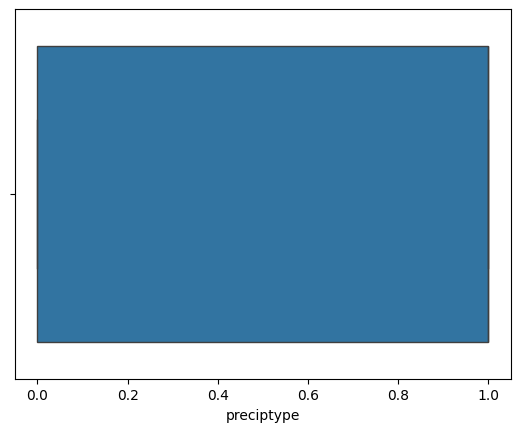

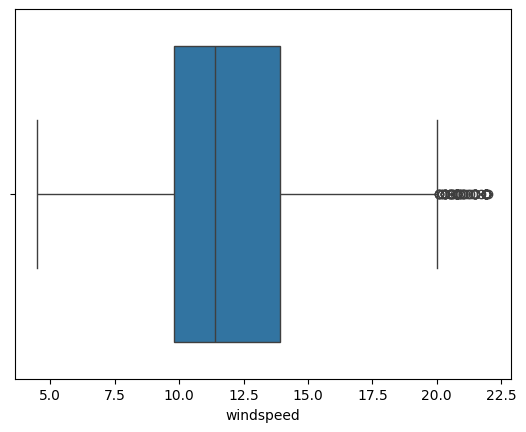

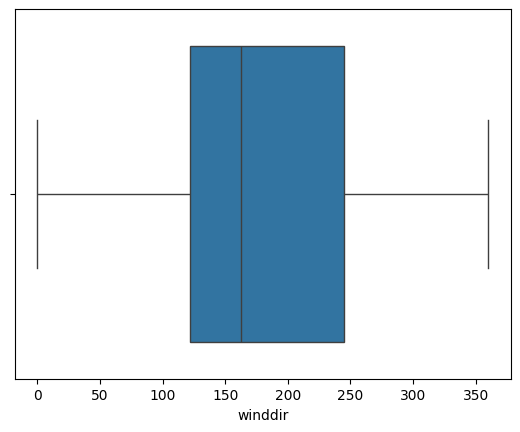

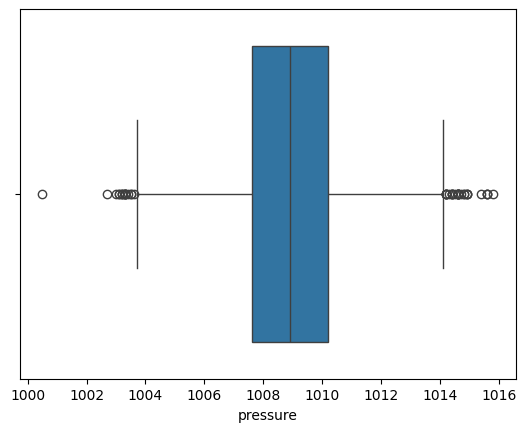

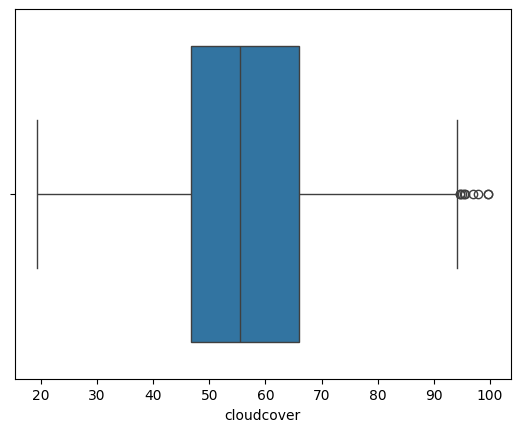

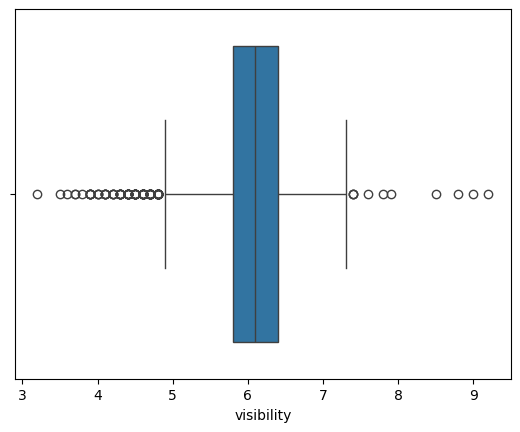

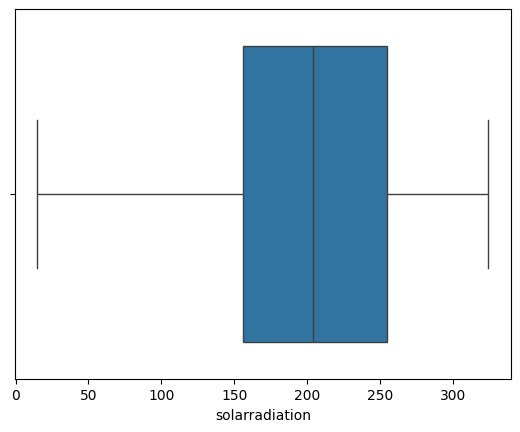

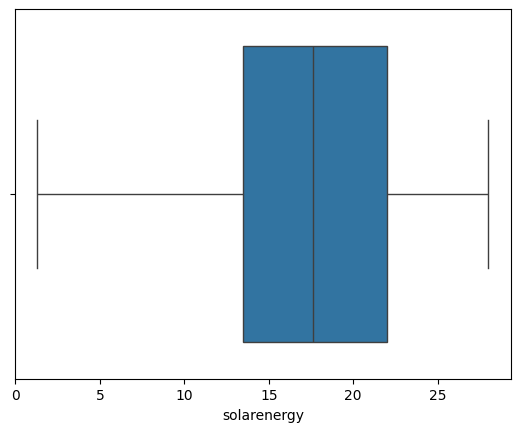

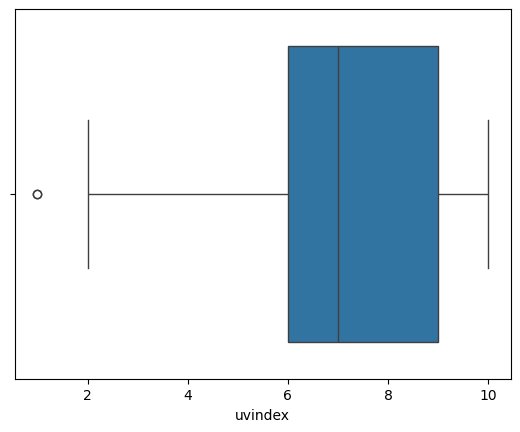

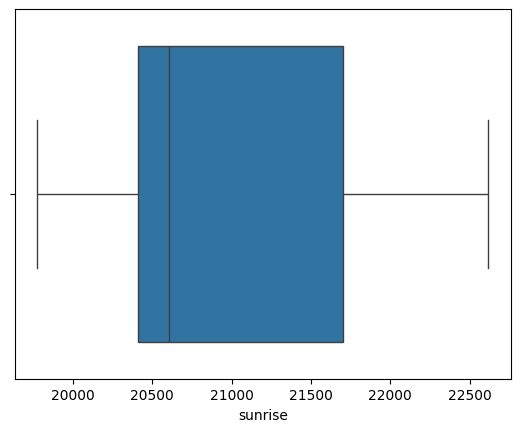

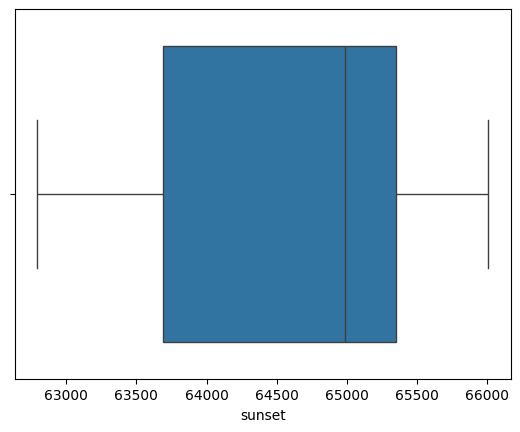

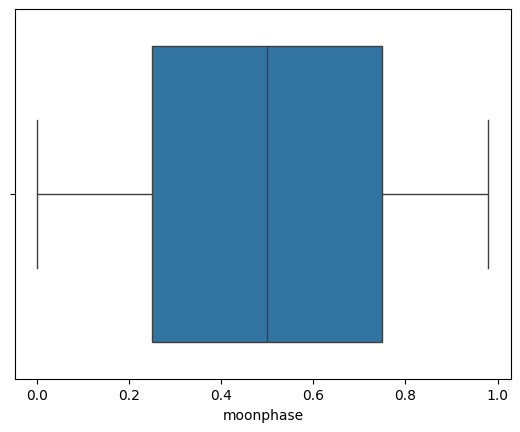

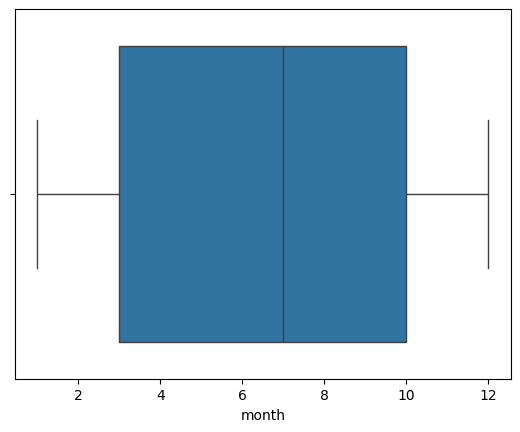

In [9]:
for col in numeric_cols:
    sns.boxplot(x = df[col])
    plt.show()

The boxplot diagrams of the features are more concentrated, with significantly fewer outliers compared to the original dataset.

# Imput missing values

In [10]:
missing_values_per_column = df.isnull().sum()

print(missing_values_per_column)

tempmax            0
tempmin            0
temp               0
feelslikemax       0
feelslikemin       0
feelslike          0
dew                0
humidity           0
preciptype         0
windspeed          0
winddir            0
pressure           1
cloudcover         0
visibility         0
solarradiation    96
solarenergy       96
uvindex           96
sunrise            0
sunset             0
moonphase          0
icon               0
month              0
dtype: int64


Using KNN imputer to impute missing values

In [11]:
k_neighbors = 3

df_imputed = df.drop(columns=['icon'])

knn_imputer = KNNImputer(n_neighbors=k_neighbors)

df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_imputed), columns=df_imputed.columns)

df_imputed['icon'] = df.reset_index(drop=False)['icon']

print(df_imputed)

      tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike   dew  \
0        87.9     73.5  78.9         100.9          73.5       82.5  76.5   
1        84.8     75.3  79.6          94.0          75.3       82.7  75.7   
2        84.5     77.1  80.5          93.5          77.1       84.6  76.2   
3        87.9     74.6  79.3         100.2          74.6       82.4  76.3   
4        89.7     75.3  80.9         100.5          75.3       85.4  76.3   
...       ...      ...   ...           ...           ...        ...   ...   
4725     92.6     80.4  83.8         111.9          87.4       95.1  79.3   
4726     93.2     80.3  85.0         112.7          87.4       97.5  79.3   
4727     93.2     80.5  84.3         113.5          87.9       97.1  79.9   
4728     95.0     75.2  85.5         116.0          75.2       98.0  79.7   
4729     91.4     77.0  81.7         110.8          77.0       88.1  79.0   

      humidity  preciptype  windspeed  ...  cloudcover  visibility  \
0    

In [12]:
missing_values_per_column = df_imputed.isnull().sum()

print(missing_values_per_column)

tempmax           0
tempmin           0
temp              0
feelslikemax      0
feelslikemin      0
feelslike         0
dew               0
humidity          0
preciptype        0
windspeed         0
winddir           0
pressure          0
cloudcover        0
visibility        0
solarradiation    0
solarenergy       0
uvindex           0
sunrise           0
sunset            0
moonphase         0
month             0
icon              0
dtype: int64


# Check multicollinearity

In [13]:
df_imputed.drop(columns=['icon']).corr(method="spearman")

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,month
tempmax,1.000000,0.460016,0.814620,0.500703,0.458740,0.639349,-0.067701,-0.544816,-0.226241,0.120670,...,0.102065,-0.489003,0.348509,0.390015,0.389623,0.346047,-0.107050,0.257120,0.014871,-0.344268
tempmin,0.460016,1.000000,0.773513,0.621291,0.999668,0.826505,0.449597,-0.078858,0.168078,0.181249,...,-0.255778,-0.036569,0.207298,0.011899,0.011404,-0.010579,-0.425841,0.352331,0.002603,-0.075760
temp,0.814620,0.773513,1.000000,0.596818,0.772961,0.908269,0.164622,-0.457510,-0.063955,0.102871,...,-0.046033,-0.370568,0.362122,0.267486,0.267005,0.228366,-0.259279,0.310386,0.006109,-0.214379
feelslikemax,0.500703,0.621291,0.596818,1.000000,0.623046,0.798345,0.728902,0.270039,0.353794,0.263732,...,-0.448493,0.123066,-0.018128,-0.175358,-0.175628,-0.203599,-0.670517,0.485297,-0.002233,0.052155
feelslikemin,0.458740,0.999668,0.772961,0.623046,1.000000,0.827259,0.454316,-0.075272,0.170918,0.181253,...,-0.257933,-0.034975,0.206306,0.009102,0.008615,-0.013167,-0.427080,0.353409,0.002102,-0.074512
feelslike,0.639349,0.826505,0.908269,0.798345,0.827259,1.000000,0.507388,-0.114095,0.174587,0.142433,...,-0.273529,-0.130611,0.197430,0.037459,0.037053,0.004208,-0.496072,0.397258,-0.001791,-0.051515
dew,-0.067701,0.449597,0.164622,0.728902,0.454316,0.507388,1.000000,0.758486,0.595112,0.184055,...,-0.616716,0.484983,-0.310520,-0.493262,-0.493209,-0.495521,-0.713890,0.357174,-0.007350,0.305837
humidity,-0.544816,-0.078858,-0.457510,0.270039,-0.075272,-0.114095,0.758486,1.000000,0.590804,0.113042,...,-0.529386,0.686312,-0.519026,-0.603699,-0.603391,-0.583122,-0.480210,0.105447,-0.015454,0.443455
preciptype,-0.226241,0.168078,-0.063955,0.353794,0.170918,0.174587,0.595112,0.590804,1.000000,0.126383,...,-0.461525,0.568221,-0.338157,-0.559425,-0.559375,-0.532806,-0.539058,0.200111,-0.015462,0.370297
windspeed,0.120670,0.181249,0.102871,0.263732,0.181253,0.142433,0.184055,0.113042,0.126383,1.000000,...,-0.302136,0.117656,0.222670,-0.072362,-0.073042,-0.097045,-0.273186,0.466928,-0.024228,-0.174130


In [14]:
target = ['icon']
features = df_imputed.columns.drop(target)
X = df_imputed[features]
y = df_imputed[target]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [15]:
vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled.sort_values("VIF", ascending=False))

           Feature          VIF
14  solarradiation  2603.285052
15     solarenergy  2576.543651
7         humidity   199.007313
6              dew   198.145954
2             temp    90.069156
5        feelslike    39.244692
1          tempmin    14.556411
16         uvindex    12.558147
3     feelslikemax    10.212187
4     feelslikemin     9.956670
0          tempmax     9.361763
17         sunrise     3.959977
18          sunset     3.425218
20           month     3.072347
12      cloudcover     2.496930
11        pressure     2.115055
8       preciptype     2.106020
10         winddir     1.572901
13      visibility     1.558748
9        windspeed     1.497408
19       moonphase     1.003994


In [16]:
high_vif_cols = vif_data_scaled[vif_data_scaled["VIF"] > 5]
print(high_vif_cols.sort_values("VIF", ascending=False))

           Feature          VIF
14  solarradiation  2603.285052
15     solarenergy  2576.543651
7         humidity   199.007313
6              dew   198.145954
2             temp    90.069156
5        feelslike    39.244692
1          tempmin    14.556411
16         uvindex    12.558147
3     feelslikemax    10.212187
4     feelslikemin     9.956670
0          tempmax     9.361763


Remove high VIF columns sequencely

In [17]:
X = X.loc[:, X.columns != 'solarradiation']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

         Feature         VIF
0        tempmax    9.361657
1        tempmin   14.556409
2           temp   90.037464
3   feelslikemax   10.212166
4   feelslikemin    9.955846
5      feelslike   39.237515
6            dew  198.108054
7       humidity  198.975721
8     preciptype    2.105976
9      windspeed    1.497392
10       winddir    1.572321
11      pressure    2.113191
12    cloudcover    2.494564
13    visibility    1.558703
14   solarenergy   13.715529
15       uvindex   12.423262
16       sunrise    3.957573
17        sunset    3.420715
18     moonphase    1.003994
19         month    3.071835


In [18]:
X = X.loc[:, X.columns != 'solarenergy']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

         Feature         VIF
0        tempmax    9.345910
1        tempmin   14.553001
2           temp   89.452203
3   feelslikemax   10.197593
4   feelslikemin    9.954433
5      feelslike   39.085255
6            dew  197.956214
7       humidity  198.637890
8     preciptype    2.049939
9      windspeed    1.497098
10       winddir    1.570997
11      pressure    2.110020
12    cloudcover    2.464741
13    visibility    1.558012
14       uvindex    1.772456
15       sunrise    3.920237
16        sunset    3.393557
17     moonphase    1.003801
18         month    3.068330


In [19]:
X = X.loc[:, X.columns != 'humidity']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

         Feature        VIF
0        tempmax   9.058329
1        tempmin  13.762925
2           temp  38.552682
3   feelslikemax  10.195591
4   feelslikemin   9.590607
5      feelslike  33.869371
6            dew   9.324712
7     preciptype   2.049685
8      windspeed   1.491183
9        winddir   1.570993
10      pressure   2.106664
11    cloudcover   2.463037
12    visibility   1.506366
13       uvindex   1.772207
14       sunrise   3.888559
15        sunset   3.390557
16     moonphase   1.003799
17         month   3.062856


In [20]:
X = X.loc[:, X.columns != 'temp']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

         Feature       VIF
0        tempmax  5.564940
1        tempmin  8.334682
2   feelslikemax  8.938009
3   feelslikemin  7.777144
4      feelslike  8.768623
5            dew  8.169618
6     preciptype  2.043921
7      windspeed  1.491177
8        winddir  1.570974
9       pressure  2.103832
10    cloudcover  2.461398
11    visibility  1.503775
12       uvindex  1.761368
13       sunrise  3.879081
14        sunset  3.388853
15     moonphase  1.003697
16         month  3.046918


In [21]:
X = X.loc[:, X.columns != 'feelslike']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

         Feature       VIF
0        tempmax  5.012386
1        tempmin  8.109080
2   feelslikemax  8.427725
3   feelslikemin  7.106084
4            dew  7.804708
5     preciptype  2.039965
6      windspeed  1.414807
7        winddir  1.570098
8       pressure  2.103756
9     cloudcover  2.320923
10    visibility  1.430458
11       uvindex  1.761236
12       sunrise  3.861223
13        sunset  3.383389
14     moonphase  1.003574
15         month  3.041736


In [22]:
X = X.loc[:, X.columns != 'feelslikemax']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

         Feature       VIF
0        tempmax  2.277129
1        tempmin  8.100258
2   feelslikemin  7.106075
3            dew  3.787130
4     preciptype  2.038805
5      windspeed  1.405428
6        winddir  1.567468
7       pressure  2.100503
8     cloudcover  2.319671
9     visibility  1.430439
10       uvindex  1.761135
11       sunrise  3.822019
12        sunset  3.327560
13     moonphase  1.003512
14         month  3.036619


In [23]:
X = X.loc[:, X.columns != 'feelslikemin']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

       Feature       VIF
0      tempmax  2.274254
1      tempmin  2.176115
2          dew  3.775780
3   preciptype  2.020429
4    windspeed  1.400523
5      winddir  1.567440
6     pressure  2.097901
7   cloudcover  2.317798
8   visibility  1.428732
9      uvindex  1.759950
10     sunrise  3.793118
11      sunset  3.324693
12   moonphase  1.003418
13       month  3.021924


In [24]:
df = df_imputed[X.columns]
df['label'] = df_imputed['icon']

df.to_csv('../data/processed_data.csv', index=False)

df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_20492\1809537093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df_imputed['icon']


,tempmax,tempmin,dew,preciptype,windspeed,winddir,pressure,cloudcover,visibility,uvindex,sunrise,sunset,moonphase,month,label
0,87.9,73.5,76.5,0.0,18.3,263.1,1005.5,87.9,5.6,5.666667,20523.0,63977.0,0.27,9.0,partly-cloudy-day
1,84.8,75.3,75.7,0.0,13.9,258.8,1003.1,90.4,6.6,4.333333,20520.0,63939.0,0.30,9.0,cloudy
2,84.5,77.1,76.2,0.0,16.1,251.4,1000.5,82.1,6.6,6.000000,20518.0,63901.0,0.34,9.0,partly-cloudy-day
3,87.9,74.6,76.3,0.0,17.2,260.5,1002.7,90.0,5.7,6.666667,20516.0,63864.0,0.37,9.0,partly-cloudy-day
4,89.7,75.3,76.3,0.0,12.8,234.3,1006.0,70.8,6.6,7.666667,20514.0,63826.0,0.40,10.0,partly-cloudy-day


# Conclusion

- Removed or converted columns with high missing values or those that did not contribute significantly in terms of meaning.
- Removed extremed outliers.
- Imputed missing values using KNN
- Handling multicollinearity